In [3]:
import pandas as pd
import numpy as np
import pylab as pl #allows to use both numpy and matplotlib.pyplot functionalities within a single namespace, making it easy for quick and simple plotting tasks
import scipy.optimize as opt
from sklearn import preprocessing
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data="https://docs.google.com/uc?export=download&id=18Bdf6svAXDrLIugTYBMSfDNOwVkmwLZl"
df=pd.read_csv(data)

In [7]:
df.drop(['education'],inplace=True,axis=1)
df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [9]:
df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
df.dropna(axis=0,inplace=True)
df.head()


,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
print(df.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


In [15]:
X = np.asarray(df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(df['TenYearCHD'])

In [16]:
X=preprocessing.StandardScaler().fit(X).transform(X)

<Axes: >

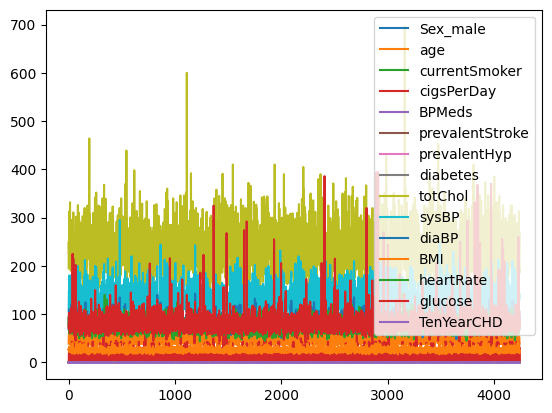

In [21]:
df.plot()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 4)


In [23]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


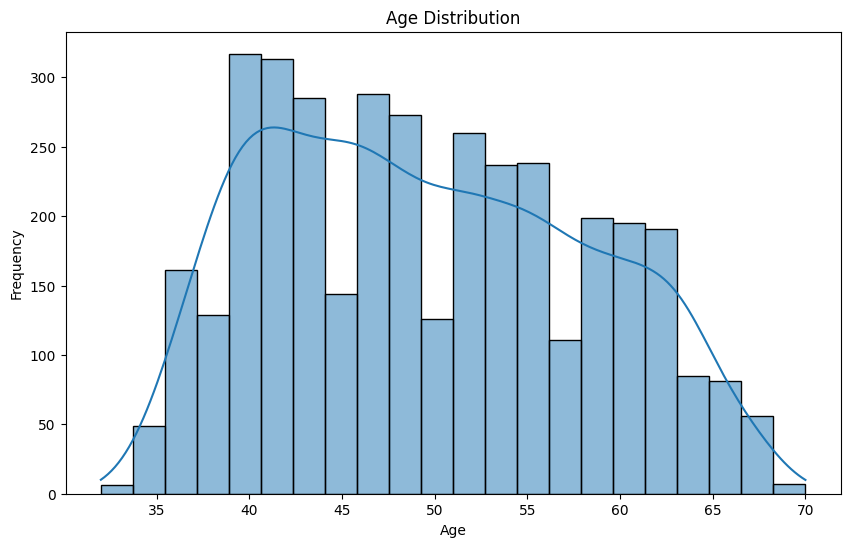

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

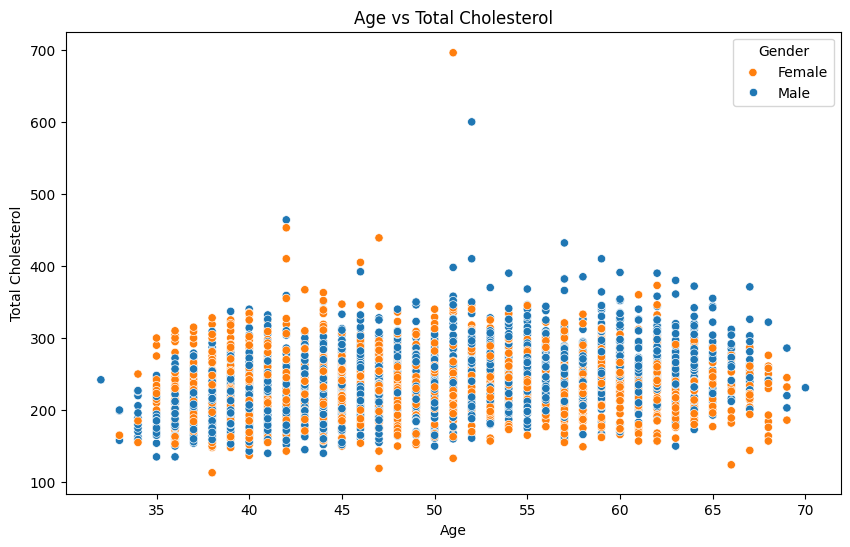

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='totChol', hue='Sex_male', data=df)
plt.title('Age vs Total Cholesterol')
plt.xlabel('Age')
plt.ylabel('Total Cholesterol')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

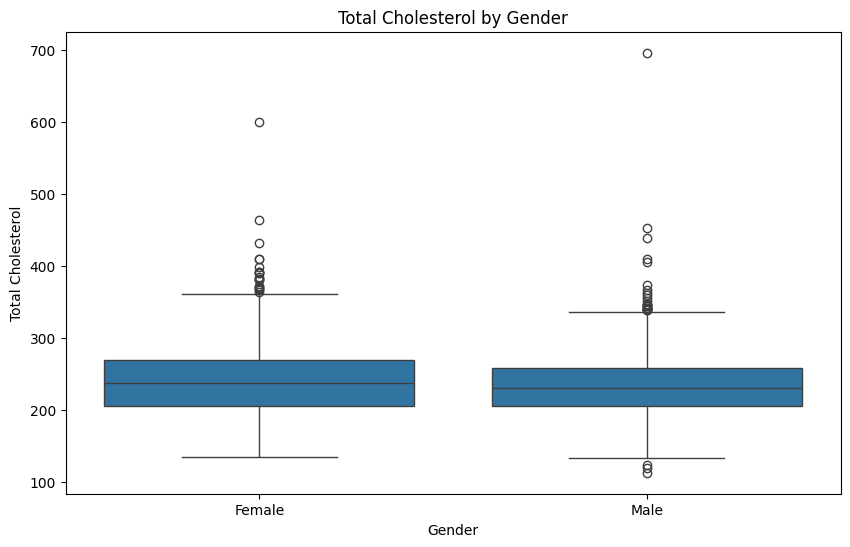

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex_male', y='totChol', data=df)
plt.title('Total Cholesterol by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Cholesterol')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

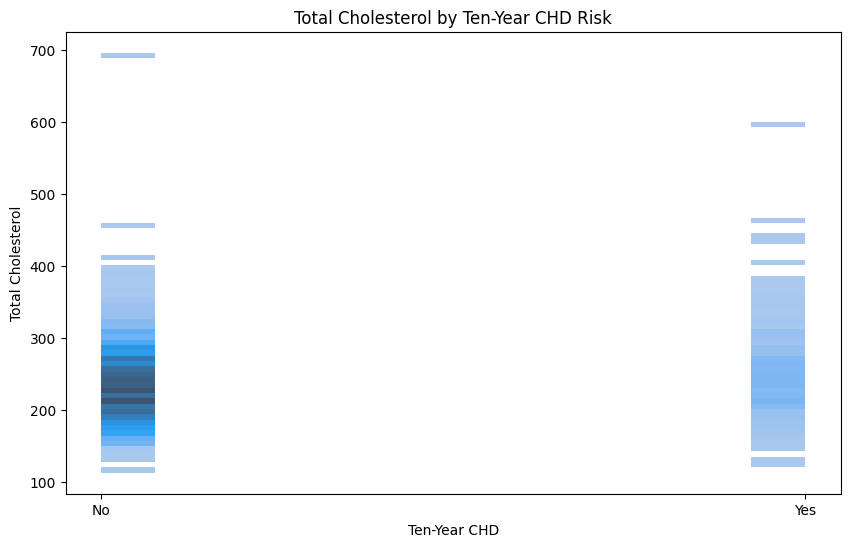

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(x='TenYearCHD', y='totChol', data=df)
plt.title('Total Cholesterol by Ten-Year CHD Risk')
plt.xlabel('Ten-Year CHD')
plt.ylabel('Total Cholesterol')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

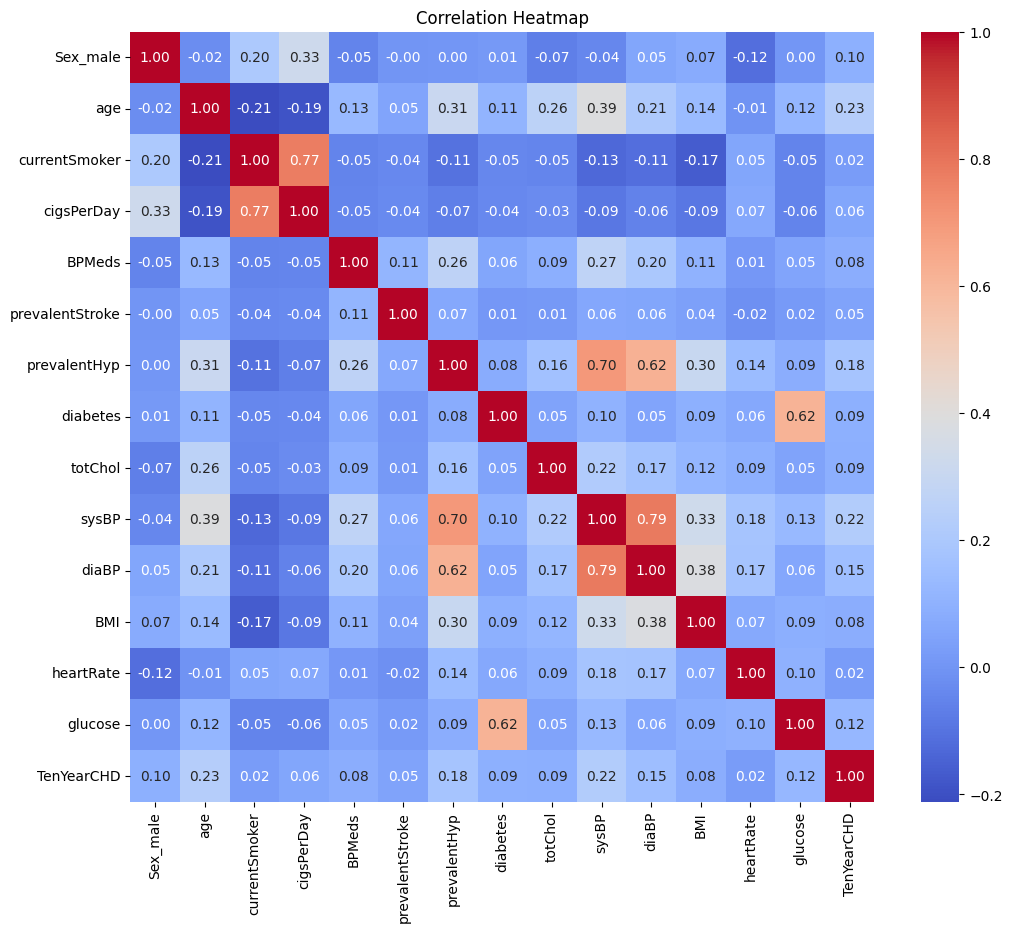

In [34]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.8490230905861457


In [39]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,pred))


[[942   9]
 [161  14]]
